In [1]:
import pandas as pd
import os
import re
from datetime import datetime as dt
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import requests
import time
import random
import pickle

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

Merging original datasets
====

In [2]:
def find_all_files(path, ty='csv', Name='Merged_DF_msm.csv'):
    #Iteratively appends all files with ty extention to list_of_files
    for root,dirs,files in os.walk(path):
        [list_of_files.append(file) for file in files if (file.endswith(f".{ty}") and (file!=Name))]

In [3]:
Name = 'Merged_DF_msm.csv' #Name of Final DF
list_of_files = []
data_path = os.path.join('..', 'Data')
find_all_files(data_path, Name=Name)

Total_DF = pd.DataFrame()
for file in list_of_files:
    try:
        DF = pd.read_csv(os.path.join('..', 'Data', file), encoding='utf-8')
    except:
        DF = pd.read_csv(os.path.join('..', 'Data', file), encoding='latin1')
    DF['country'] = file[:2]
    Total_DF = (DF if Total_DF.empty else pd.concat([Total_DF, DF]))

Data Cleaning
====

In [4]:
#changing format of date variables
Total_DF['trending_date'] = Total_DF['trending_date'].map(lambda x: dt.strptime(x, "%y.%d.%m"))



In [5]:
Total_DF['publish_time'] = pd.to_datetime(Total_DF['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
Total_DF['description'].fillna(value='', inplace=True)

In [6]:
Total_DF

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10 17:00:03,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,CA
1,0dBIkQ4Mz1M,2017-11-14,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13 17:00:00,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,CA
3,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,CA
4,2Vv-BfVoq4g,2017-11-14,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09 11:04:14,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,2018-06-14,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18 13:00:04,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals,US
40945,1h7KV2sjUWY,2018-06-14,True Facts : Ant Mutualism,zefrank1,22,2018-05-18 01:00:06,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,,US
40946,D6Oy4LfoqsU,2018-06-14,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18 17:34:22,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...,US
40947,oV0zkMe1K8s,2018-06-14,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17 17:00:04,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...,US


In [7]:
#Drop the duplicate rows
Total_DF.drop_duplicates(subset=['video_id', 'trending_date', 'country'], keep='last', inplace=True)
Total_DF.reset_index(drop=True, inplace=True)
to_drop = Total_DF[(Total_DF['video_id']=='#NAME?') | (Total_DF['video_id']=='#VALUE!')].index
Total_DF.drop(to_drop, inplace=True)
Total_DF.reset_index(drop=True, inplace=True)

In [8]:
#Publish time is supposed to be unique. Remove the videos with More than 1 publish time 
Temp_TF = Total_DF.groupby('video_id').aggregate(Publish_Time_Unique_Count = ('publish_time', lambda x : len(set(x.to_list()))))           
#Drop these 28 videos, total 105 corresponding rows
Total_DF.drop(Total_DF[Total_DF['video_id'].isin(Temp_TF[Temp_TF['Publish_Time_Unique_Count']>1].index)].index, inplace=True)
Total_DF.reset_index(drop=True, inplace=True)

In [9]:
#Some Videos are removed after some time; Let's exclude these videos from the analysis as there is a manual intervention or environment issue 
#51 videos had error (atleast once); Total 143 rows
#Both the below codes give exactly same results; MEANS 'video_error_or_removed' really means that atleast once 'video_error_or_removed'
#Total_DF[Total_DF['video_id'].isin(Total_DF[Total_DF['video_error_or_removed']]['video_id'].unique())]
#Total_DF[Total_DF['video_error_or_removed']]
Total_DF.drop(Total_DF[Total_DF['video_id'].isin(Total_DF[Total_DF['video_error_or_removed']]['video_id'].unique())].index, inplace=True)
Total_DF.reset_index(drop=True, inplace=True)

In [10]:
#Remove 'video_error_or_removed' as it doesn't make sense now
Total_DF.drop('video_error_or_removed', inplace=True, axis=1)

In [109]:
#create dataframe limited to unique dates per id/country
no_countries_DF = Total_DF.drop_duplicates(subset=['video_id', 'country'], keep='first')

In [110]:
#calculate how many countries each video trended in
no_of_countries_trended_in = no_countries_DF.groupby('video_id')['country'].count()

In [122]:
no_of_countries_trended_in

video_id
--1skHapGUc    1
--2K8l6BWfw    1
--45ws7CEN0    3
--6vcer7XYQ    1
--728h8mnDY    1
              ..
zzuI1sona1M    1
zzvWC_pDiIk    1
zzxLG6R5cHI    1
zzyGHbhCpV4    1
zzz0_5fMnI8    1
Name: country, Length: 184206, dtype: int64

In [316]:
# calculate days each video trended per country
Trending_Days = Total_DF.groupby(['video_id', 'country']).aggregate(Days_trending=('trending_date', 'count'))

In [317]:
unstacked_Trending_Days = Trending_Days.unstack()

In [318]:
unstacked_Trending_Days.fillna(value=0, inplace=True)

In [319]:
final_Trending_Days = pd.DataFrame(unstacked_Trending_Days.to_records()) 

In [320]:
final_Trending_Days

,video_id,"('Days_trending', 'CA')","('Days_trending', 'DE')","('Days_trending', 'FR')","('Days_trending', 'GB')","('Days_trending', 'IN')","('Days_trending', 'JP')","('Days_trending', 'KR')","('Days_trending', 'MX')","('Days_trending', 'RU')","('Days_trending', 'US')"
0,--1skHapGUc,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,--2K8l6BWfw,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,--45ws7CEN0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,--6vcer7XYQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
4,--728h8mnDY,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
184201,zzuI1sona1M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
184202,zzvWC_pDiIk,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
184203,zzxLG6R5cHI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
184204,zzyGHbhCpV4,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0


In [321]:
#calculate no. of countries each video trended in
no_of_countries_trended_in = no_countries_DF.groupby('video_id')['country'].count()
    
    #create a dataframe with findings
no_of_countries_df= pd.DataFrame({"No of Countries Trended In" : no_of_countries_trended_in})

#calculate the sum of days trended per video across countries
sum_of_days_trended = final_Trending_Days.sum(axis=1)

 #create a dataframe with findings
sum_of_days_df = pd.DataFrame({"video_id" : final_Trending_Days["video_id"],
                               "Sum of Days trended" : sum_of_days_trended})

sum_of_days_df.set_index("video_id", inplace=True)

#merge datasets

combined_per_video_df = pd.merge(sum_of_days_df, no_of_countries_df, on="video_id")

combined_per_video_df["Mean Days Trending"] = combined_per_video_df["Sum of Days trended"]/combined_per_video_df["No of Countries Trended In"]

In [322]:
combined_per_video_df.describe()


,Sum of Days trended,No of Countries Trended In,Mean Days Trending
count,184206.000000,184206.000000,184206.000000
mean,1.955512,1.123785,1.613254
std,3.141935,0.537992,1.614128
min,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000
75%,2.000000,1.000000,2.000000
max,89.000000,10.000000,37.000000


Text(0.5, 0, 'No of Countries Video Trended In')

Text(0, 0.5, 'Means days Video Trended')

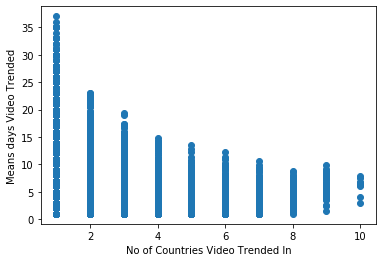

In [237]:
plt.scatter(combined_per_video_df["No of Countries Trended In"],
            combined_per_video_df["Mean Days Trending"])
plt.xlabel("No of Countries Video Trended In")
plt.ylabel("Means days Video Trended")
plt.show()

([<matplotlib.patches.Wedge at 0x21962609ec8>,
 [Text(-0.113963703877868, -1.0940805611098472, '1'),
  Text(0.23173442026318897, 1.075313516359431, '2 to 4'),
  Text(-0.7611528267614565, 0.7941324664771264, 'more than 4')],
 [Text(-0.0621620202970189, -0.5967712151508257, '68.9%'),
  Text(0.12640059287083033, 0.5865346452869622, '27.6%'),
  Text(-0.4151742691426126, 0.433163163532978, '3.5%')])

Text(0.5, 1.0, 'Mean No. of Day Video Trended')

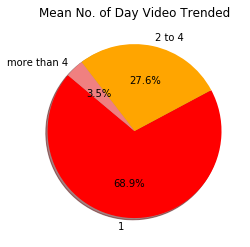

In [249]:
#no. of countries findings display

    #stratify dataset
single_day = combined_per_video_df.loc[
    combined_per_video_df["Mean Days Trending"]==1, :]

two_to_four_day = combined_per_video_df.loc[
    (combined_per_video_df["Mean Days Trending"]>1) &
    (combined_per_video_df["Mean Days Trending"]<=4), :]

more_than_four_day = combined_per_video_df.loc[
    combined_per_video_df["Mean Days Trending"]>4, :]
    
    #visualize
# Labels for the sections of our pie chart
labels = ["1", "2 to 4", "more than 4"]

# The values of each section of the pie chart

sizes = [len(single_day)/len(combined_per_video_df), 
         len(two_to_four_day)/len(combined_per_video_df), 
         len(more_than_four_day)/len(combined_per_video_df)]

# The colors of each section of the pie chart
colors = ["red", "orange", "lightcoral", "lightskyblue"]


#Display
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Mean No. of Day Video Trended")

In [250]:
more_than_four_day

,Sum of Days trended,No of Countries Trended In,Mean Days Trending
video_id,,,
--uXQQ0h-yQ,9.0,1,9.0
-0neBEVK-3Y,5.0,1,5.0
-35jibKqbEo,8.0,1,8.0
-37nIo_tLnk,8.0,1,8.0
-3VBPAZPTQI,14.0,1,14.0
...,...,...,...
zwrlJwed2mQ,7.0,1,7.0
zxGg8QqWrRQ,5.0,1,5.0
zxUwbflE1SY,5.0,1,5.0


([<matplotlib.patches.Wedge at 0x21fd467ca88>,
 [Text(0.6553067533227522, -0.8835004578660918, '1'),
  Text(-0.6400069651973278, 0.8946457871688139, '2 to 4'),
  Text(-0.8303573383535381, 0.7214614962993022, 'more than 4')],
 [Text(0.3574400472669557, -0.4819093406542318, '92.5%'),
  Text(-0.3490947082894515, 0.4879886111829893, '6.9%'),
  Text(-0.45292218455647526, 0.39352445252689205, '0.5%')])

Text(0.5, 1.0, 'No. of Countries Video Trended In')

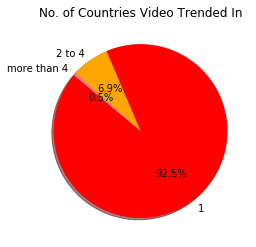

In [254]:
#no. of countries findings display

    #stratify dataset
single_country = combined_per_video_df.loc[
    combined_per_video_df["No of Countries Trended In"]==1, :]

two_to_four_country = combined_per_video_df.loc[
    (combined_per_video_df["No of Countries Trended In"]>1) &
    (combined_per_video_df["No of Countries Trended In"]<=4), :]

more_than_four_country = combined_per_video_df.loc[
    combined_per_video_df["No of Countries Trended In"]>4, :]
    
    #visualize
# Labels for the sections of our pie chart
labels = ["1", "2 to 4", "more than 4"]

# The values of each section of the pie chart

sizes = [len(single_country)/len(combined_per_video_df), 
         len(two_to_four_country)/len(combined_per_video_df), 
         len(more_than_four_country)/len(combined_per_video_df)]

# The colors of each section of the pie chart
colors = ["red", "orange", "lightcoral", "lightskyblue"]


#Display
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("No. of Countries Video Trended In")

<Figure size 360x360 with 0 Axes>

([<matplotlib.axis.XTick at 0x21fcf9e7c48>,
 <a list of 3 Text xticklabel objects>)

Text(0.5, 0, 'No, of Countries Video Trends in')

Text(0, 0.5, 'Mean No. of Days Video Trends')

Text(0.5, 1.0, 'Days Trending by the No. of Countries trended in')

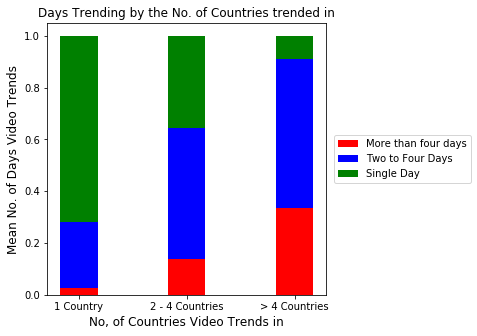

In [313]:
#create stacked bar chart

#set up of data 
single_day_set = [len(single_day.loc[
        single_day["No of Countries Trended In"]==1,:])/len(single_country),
        len(single_day.loc[
        (single_day["No of Countries Trended In"]>1) &
        (single_day["No of Countries Trended In"]<=4), :])/len(two_to_four_country),
        len(single_day.loc[
        single_day["No of Countries Trended In"]>4,:])/len(more_than_four_country)]

two_to_four_day_set = [len(two_to_four_day.loc[
        two_to_four_day["No of Countries Trended In"]==1,:])/len(single_country),
        len(two_to_four_day.loc[
        (two_to_four_day["No of Countries Trended In"]>1) &
        (two_to_four_day["No of Countries Trended In"]<=4), :])/len(two_to_four_country),
        len(two_to_four_day.loc[
        two_to_four_day["No of Countries Trended In"]>4,:])/len(more_than_four_country)]  

more_than_four_day_set = [len(more_than_four_day.loc[
        more_than_four_day["No of Countries Trended In"]==1,:])/len(single_country),
        len(more_than_four_day.loc[
        (more_than_four_day["No of Countries Trended In"]>1) &
        (more_than_four_day["No of Countries Trended In"]<=4), :])/len(two_to_four_country),
        len(more_than_four_day.loc[
        more_than_four_day["No of Countries Trended In"]>4,:])/len(more_than_four_country)]

# the x locations for the groups
N = 3
x = ['More than four days', 'Two to Four Days', 'Single Day']

# the width of the bars
width = 0.35       

#plot

plt.figure(figsize=(5,5))

p1 = plt.bar(ind, 
             single_day_set, 
             width, color ='g', 
             bottom=[i+j for i,j in zip(
                 more_than_four_day_set, two_to_four_day_set)])
p2 = plt.bar(ind, 
             two_to_four_day_set, 
             width, color ='b', 
             bottom=more_than_four_day_set)

p3 = plt.bar(ind, 
             more_than_four_day_set, 
             width, color ='r')


#format x-axis
plt.xticks(x, ('1 Country',
                '2 - 4 Countries',
                 '> 4 Countries',))

#plt.xlim(-0.5,len(x))


#labelling
plt.xlabel('No, of Countries Video Trends in', fontsize = 12)
plt.ylabel('Mean No. of Days Video Trends', fontsize = 12)
plt.title('Days Trending by the No. of Countries trended in', 
         fontsize = 12)

plt.legend((p3[0], p2[0], p1[0]), ('More than four days',
                                   'Two to Four Days',
                                   'Single Day'),
                                   bbox_to_anchor=(1.01,0.5),
                                   loc='center left')
plt.show()

In [ ]:
#need to figure out data labels

# add text annotation corresponding to the values of each bar
for xpos, ypos, yval in zip(x, more_than_four_day_set/2, more_than_four_day_set):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
for xpos, ypos, yval in zip(x, more_than_four_day_set+two_to_four_day_set/2, two_to_four_day_set):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
for xpos, ypos, yval in zip(x, more_than_four_day_set+two_to_four_day_set+single_day_set/2, single_day_set):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")

Text(0.5, 0, 'No of Countries')

Text(0, 0.5, 'Means days Trending')

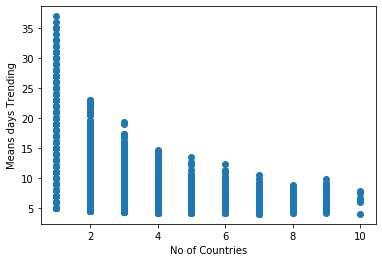

In [205]:
#scatter plot of the above bargraph
plt.scatter(more_than_4["No of Countries Trended In"],
            more_than_4["Mean Days Trending"])
plt.xlabel("No of Countries")
plt.ylabel("Means days Trending")
plt.show()